In [2]:
%run Company2CoursesPreprocessing.ipynb

In [3]:
# mapping the matrix into a 3 column dataframe=> using originalRatingsData from Company2CoursesPreprocessing.ipynb
# using result (sparse matrix from Company2CoursesPreprocessing.ipynb )
R = result.to_numpy()
company_ratings_mean = np.mean(R, axis = 1)
Ratings_demeaned = R - company_ratings_mean.reshape(-1, 1)

In [4]:
# applying SVD ( will be useful when datapoints increase)
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(Ratings_demeaned, k = 20)
sigma = np.diag(sigma)
all_company_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + company_ratings_mean.reshape(-1, 1)

In [5]:
# getting the statistical predicted ratings, will be helpful in case certain courses were not mentioned
preds = pd.DataFrame(all_company_predicted_ratings, columns = result.columns)
preds.head()

,Artificial_Intelligence,Topics_in_Deep_Learning,Advanced_Algorithms,Digital_Image_Processing,Data_Analytics,Knowledge_Management,Big_Data,,Heterogeneous_Parallelism,System_Modeling_and_Simulation,...,Parallel_Computing,Programming_with_C++,Professional_Skills_for_Software_Engineers_I,Multimedia_Computing,Computer_Graphics_and_Visualization,Programming_with_Java,Introduction_to_Software_Testing,Social_Network_Analytics,Knowledge_management,Content_Management
0,-0.004839,0.010586,0.114880,0.106134,0.018246,0.633630,0.671544,0.027122,-0.005692,-0.006214,...,0.008113,0.253055,0.082501,0.143906,0.051812,0.024247,0.024247,0.024247,0.024247,0.024247
1,-0.002050,0.004462,-0.001582,0.501007,-0.004015,0.501100,0.998788,-0.000267,0.000838,0.001715,...,0.003151,0.001361,0.000473,-0.001319,-0.001194,-0.002531,-0.002531,-0.002531,-0.002531,-0.002531
2,0.066406,0.033950,0.240253,0.493149,0.166103,0.192684,0.773857,-0.000058,-0.007175,-0.009523,...,0.001040,0.100023,0.164876,0.007550,0.032303,0.001997,0.001997,0.001997,0.001997,0.001997
3,0.005691,0.273335,0.005249,0.139220,0.296850,0.138904,0.432821,0.572167,-0.003206,0.136921,...,-0.008669,-0.003796,-0.001537,0.004593,0.003207,0.007303,0.007303,0.007303,0.007303,0.007303
4,0.499678,0.000700,0.499564,0.000342,-0.000630,0.500369,-0.000384,-0.000041,0.000323,0.500526,...,0.500479,0.000218,0.000123,-0.000410,-0.000165,-0.000459,-0.000459,-0.000459,-0.000459,-0.000459


In [6]:
def recommend_courses(preds, result, companyName, original_ratings, num_recommendations):
    
    # Get and sort the company's predictions
    company_row_number = result.index.get_loc(companyName)
    sorted_company_predictions = preds.iloc[company_row_number].sort_values(ascending=False)
    
    company_data = original_ratings[original_ratings.CompanyName_New == (companyName)]
    company_full = (company_data.sort_values(['Rating'], ascending=False))
    
    return company_full[:num_recommendations]

In [8]:
companyName = input("Enter Company Name (finally pick from dropdown) ")
num_reco = int(input('How many courses? '))
a = recommend_courses(preds, result, companyName ,originalRatingsData, num_reco )

Enter Company Name (finally pick from dropdown) Intuit
How many courses? 10


In [9]:
a

,CompanyName_New,ElectiveCourseName,Rating
597,Intuit,Digital_Image_Processing,0.8
596,Intuit,Advanced_Algorithms,0.6
600,Intuit,Big_Data,0.4
598,Intuit,Data_Analytics,0.3
595,Intuit,Topics_in_Deep_Learning,0.3
602,Intuit,Heterogeneous_Parallelism,0.1
603,Intuit,System_Modeling_and_Simulation,0.1
605,Intuit,Fuzzy_Logic,0.1
613,Intuit,Professional_Skills_for_Software_Engineers_I,0.1
612,Intuit,Programming_with_C++,0.1


In [13]:
a.set_index('ElectiveCourseName', inplace=True)

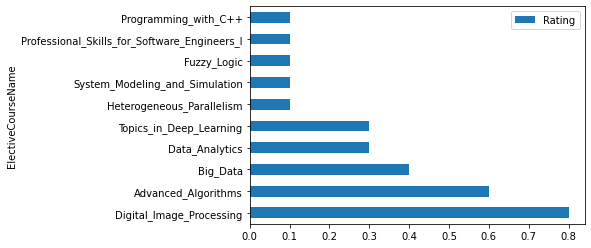

In [16]:
b = a.plot(kind="barh").get_figure()

In [18]:
b.savefig('Coursetop.jpg', dpi = 150)